In [5]:
from matplotlib import pyplot as plt
import numpy as np

from hazma.scalar_mediator import ScalarMediator
from hazma.vector_mediator import VectorMediator
from hazma.parameters import charged_pion_mass as mpi
from hazma.parameters import alpha_em
from utilities import latex_text_width_1col

**Generates plots of the pion FSR spectrum for the scalar and vector-mediator models.**

In [6]:
def dnde_ap(e_gam, mass, e_cm):
    """Altarelli-Parisi approximation of FSR spectrum.
    
    Parameters
    ----------
    e_gam : float
        Gamma-ray energy in MeV.
    mass : float
        Mass of radiating particle in MeV.
    e_cm : float
        Center-of-mass energy of reaction in MeV.
    
    Returns
    -------
    dnde : float
        Value of energy spectrum dN/dE at the specified point in
        :math:`\mathrm{MeV}^{-1}`.
    """
    x = 2.0 * e_gam / e_cm
    mu = mass / e_cm
    pre_fac = 1.0 / (137.0 * np.pi) * 2.0 / e_cm
    split_func = 2 * (1.0 - x) / x
    log_sup = -1.0 + np.log((1 - x) / mu ** 2)

    return pre_fac * split_func * log_sup

In [7]:
# As noted in the text, the specific parameter values do not impact the FSR spectra
sm = ScalarMediator(mx=100, ms=1e3, gsxx=1.0, gsff=1.0, gsGG=1.0, gsFF=1.0, lam=246e3)
vm = VectorMediator(
    mx=100, mv=1e3, gvxx=1.0, gvuu=1.0, gvdd=-1.0, gvss=0.0, gvee=0.0, gvmumu=1.0
)

# Center of mass energies
e_cms = 2 * np.array([150.0, 250.0])
# Photon energies
e_gams = np.geomspace(1, 300, num=200)

/Users/acoogan/.pyenv/versions/miniconda3-latest/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/acoogan/.pyenv/versions/miniconda3-latest/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in log


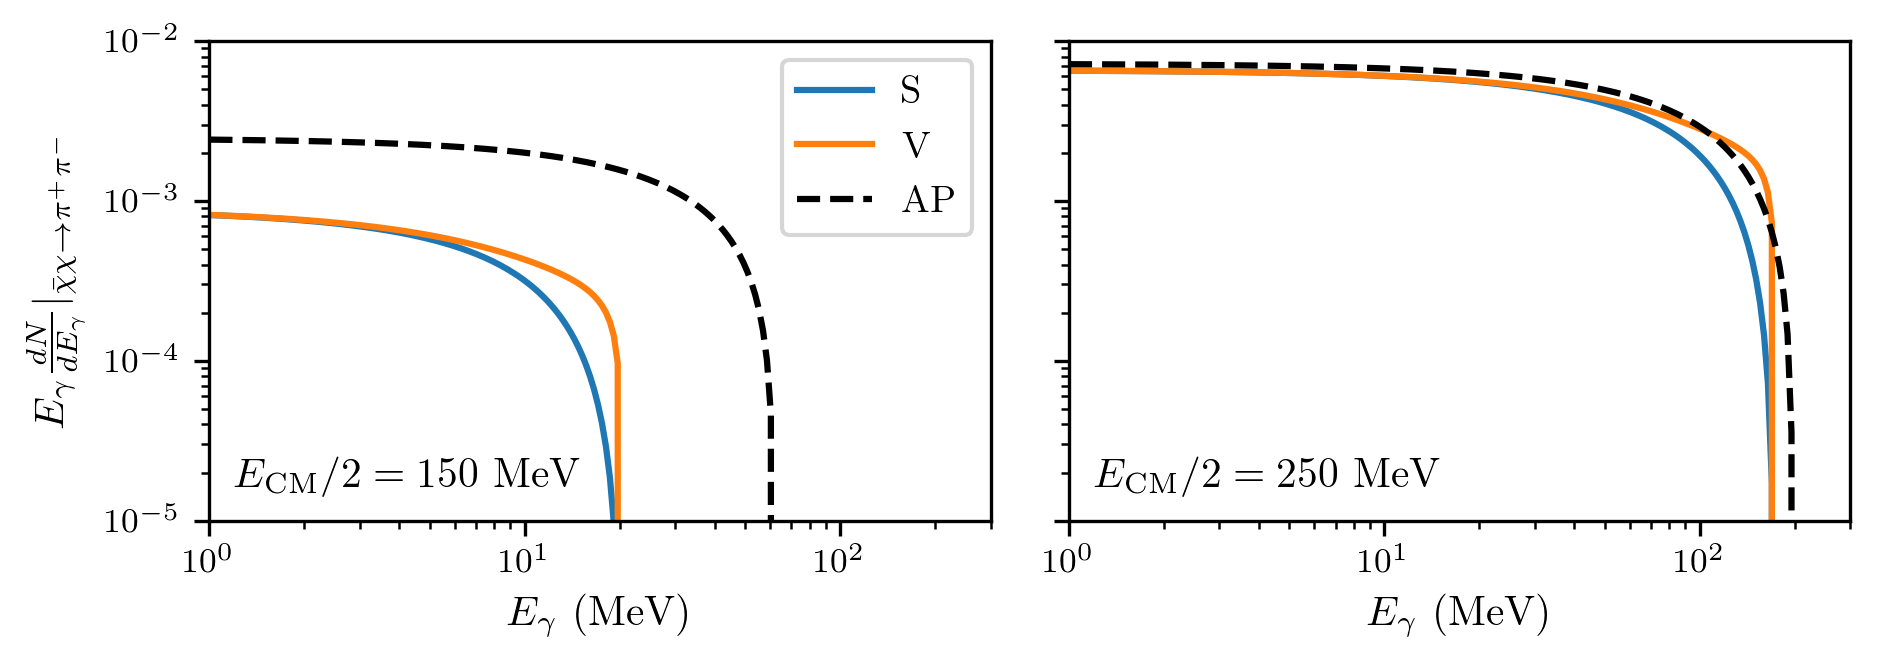

In [8]:
fig, axs = plt.subplots(
    1,
    2,
    sharex="col",
    sharey="row",
    figsize=(latex_text_width_1col, 0.3 * latex_text_width_1col),
)

for i, ax in enumerate(axs.flatten()):
    e_cm = e_cms[i]

    # Plot spectra
    ax.loglog(e_gams, e_gams * sm.dnde_pipi(e_gams, e_cm, "fsr"), label="S")
    ax.loglog(e_gams, e_gams * vm.dnde_pipi(e_gams, e_cm, "fsr"), label="V")

    # Plot AP approximation
    ax.loglog(e_gams, e_gams * dnde_ap(e_gams, mpi, e_cm), "--k", label="AP")

    # Formatting
    ax.set_xlim(e_gams[[0, -1]])
    ax.set_ylim(1e-5, 1e-2)
    ax.text(1.2, 1.5e-5, r"$E_{\mathrm{CM}}/2 = %i$ MeV" % (0.5 * e_cm), fontsize=10)
    ax.set_xlabel(r"$E_\gamma$ (MeV)")

    if i == 0:
        ax.set_ylabel(
            r"$E_\gamma \frac{dN}{dE_\gamma} |_{\bar{\chi}\chi \to \pi^+ \pi^-}$"
        )
        ax.legend(loc="upper right")

fig.subplots_adjust(hspace=0.1, wspace=0.1)
plt.savefig("figures/charged_pion_fsr.pdf", bbox_inches="tight")
plt.show()